In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from collections import deque # подключаем очереди

In [2]:
df = pd.read_csv('vk_data/vk_matrix_1.csv', index_col='Name')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, Артём Эйдик to Egor Walther
Columns: 1875 entries, Артём Эйдик to Egor Walther
dtypes: float64(1875)
memory usage: 26.8+ MB


,Артём Эйдик,Александр Поповкин,Михаил Лукин,Дмитрий Королёв,Светлана Нагинская,Виктория Кузьмичева,Марина Долбилина,Александр Пучков,Юлия Сокова,Иван Кудряшов,...,Василиса Белоусова,Ирина Родина,傅 鄭良,White Shadow,Светлана Данчина.1,Ольга Иванова,Eliza Granevich,Маргарита Пак,Влад Кузнецов,Egor Walther
Name,,,,,,,,,,,,,,,,,,,,,
Артём Эйдик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Александр Поповкин,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Михаил Лукин,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Дмитрий Королёв,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Светлана Нагинская,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ольга Иванова,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eliza Granevich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Маргарита Пак,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
names = df.columns
data = np.array(df)
data.shape

(1875, 1875)

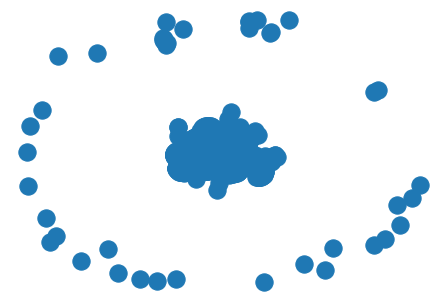

In [4]:
G = nx.from_numpy_matrix(data)
nx.draw(G)

In [5]:
n = len(data)
degree_centr = []
with open('vk_data/Степень центральности.txt','w',encoding="utf-8") as f: # открытие в режиме записи
    for i in range(n):
        w = data[i].sum() / (n - 1)
        s = names[i] + " " + str(w) + "\n"
        f.write(s)
        degree_centr.append(w)
for idx in np.argsort(-np.array(degree_centr))[:10]:
    print(names[idx], degree_centr[idx])

Арина Воробьёва 0.2193169690501601
Эка Романадзе 0.11792956243329776
Даня Еремеев 0.11472785485592316
Надежда Чернева 0.08964781216648879
Артем Абдуллаев 0.0832443970117396
Rinat Mirzagalamov 0.0768409818569904
Иван Олейников 0.06937033084311633
Анна Макарова 0.047491995731056565
Лёша Мохов 0.04589114194236926
Даниил Веловатый 0.04215581643543223


In [6]:
#если значение отличается от полученного с помощью networkx
for i, w in nx.degree_centrality(G).items():
    if round(abs(w - degree_centr[i]), 10) != 0:
        print(names[i], round(w, 10))
print("Done")

Done
